# Exploratory Data Analysis

## 3.1 Loading the libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import ppscore as pps
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings("ignore")

#### 3.1.1 Load the data

Loading the cleaned csv file from Data Wrangling step and getting to know the basic data types and columns

In [2]:
df_or = pd.read_csv('../data/processed/onlineRetail_Cleaned.csv')

In [3]:
df_or.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824293 entries, 0 to 824292
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      824293 non-null  object 
 1   StockCode    824293 non-null  object 
 2   Description  824293 non-null  object 
 3   Quantity     824293 non-null  int64  
 4   Price        824293 non-null  float64
 5   Customer ID  824293 non-null  float64
 6   Country      824293 non-null  object 
 7   Day_of_week  824293 non-null  object 
 8   Date         824293 non-null  object 
 9   Hour         824293 non-null  int64  
 10  Month        824293 non-null  int64  
 11  Year         824293 non-null  int64  
 12  Day          824293 non-null  int64  
 13  Weeknumber   824293 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 88.0+ MB


In [4]:
df_or.head()

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country,Day_of_week,Date,Hour,Month,Year,Day,Weeknumber
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.0,United Kingdom,Tuesday,2009-12-01,7,12,2009,1,49
1,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,Tuesday,2009-12-01,7,12,2009,1,49
2,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,Tuesday,2009-12-01,7,12,2009,1,49
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085.0,United Kingdom,Tuesday,2009-12-01,7,12,2009,1,49
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085.0,United Kingdom,Tuesday,2009-12-01,7,12,2009,1,49


In [5]:
#Updating the column name for the customer and assigning an appropriate data type
df_or.rename(columns={'Customer ID':'Customer_Id'},inplace = True)
df_or.Customer_Id =  df_or.Customer_Id.astype(int)

In [6]:
# Restricting only UK orders 
non_uk_orders  = df_or[df_or['Country'] != 'United Kingdom'].value_counts()
print("Non UK ordesr - {}".format(non_uk_orders.shape))
df_or = df_or[df_or['Country'] != 'United Kingdom']
df_or.head()

Non UK ordesr - (81746,)


,Invoice,StockCode,Description,Quantity,Price,Customer_Id,Country,Day_of_week,Date,Hour,Month,Year,Day,Weeknumber
71,489439,22065,CHRISTMAS PUDDING TRINKET POT,12,1.45,12682,France,Tuesday,2009-12-01,9,12,2009,1,49
72,489439,22138,BAKING SET 9 PIECE RETROSPOT,9,4.95,12682,France,Tuesday,2009-12-01,9,12,2009,1,49
73,489439,22139,RETRO SPOT TEA SET CERAMIC 11 PC,9,4.95,12682,France,Tuesday,2009-12-01,9,12,2009,1,49
74,489439,22352,LUNCHBOX WITH CUTLERY RETROSPOT,12,2.55,12682,France,Tuesday,2009-12-01,9,12,2009,1,49
75,489439,85014A,BLACK/BLUE DOTS RUFFLED UMBRELLA,3,5.95,12682,France,Tuesday,2009-12-01,9,12,2009,1,49


#### 3.1.2 Finding different insights 

Finding total number of distinct products on sale

In [7]:
df_or.StockCode.nunique()

3675

There are ~4631 unique products that are being sold by the online retail store in United Kingdom.


Number of orders that have quantity less than 0. We can see that they are directly related to the order being cancelled. There are 16005 orders that have been cancelled.

In [8]:
neg_qty_df = df_or[(df_or.Quantity < 0)]
neg_qty_df.shape

(2739, 14)

In [9]:
#Sorting the stock codes from highest to lowest
Stock_counts = df_or.groupby(by='StockCode').size().reset_index(name='counts')
Stock_counts.sort_values(by='counts', ascending=False)

,StockCode,counts
3674,POST,1873
1356,22326,535
1442,22423,530
486,21212,406
876,21731,394
...,...,...
3207,84907,1
3208,84909A,1
3209,84910A,1
288,20906,1


We are going to find the costliest and the cheapest products that are being sold.

Going forward we are going to use the dataframe that is excluding the Cancelled orders

In [10]:
df_or[df_or.Quantity > 0].sort_values(by='Price',ascending=False).head()

,Invoice,StockCode,Description,Quantity,Price,Customer_Id,Country,Day_of_week,Date,Hour,Month,Year,Day,Weeknumber
96822,501768,M,Manual,1,6958.17,15760,Norway,Friday,2010-03-19,11,3,2010,19,11
96738,501766,M,Manual,1,6958.17,15760,Norway,Friday,2010-03-19,11,3,2010,19,11
733760,573080,M,Manual,1,4161.06,12536,France,Thursday,2011-10-27,14,10,2011,27,43
733757,573077,M,Manual,1,4161.06,12536,France,Thursday,2011-10-27,14,10,2011,27,43
719911,571751,M,Manual,1,3949.32,12744,Singapore,Wednesday,2011-10-19,11,10,2011,19,42


In [11]:
df_or[df_or['Customer_Id'] == 15098.0]

,Invoice,StockCode,Description,Quantity,Price,Customer_Id,Country,Day_of_week,Date,Hour,Month,Year,Day,Weeknumber


In [12]:
non_cancelled_Df = df_or[df_or.Quantity > 0]

In [13]:
non_cancelled_Df[non_cancelled_Df.Price == df_or.Price.min()]

,Invoice,StockCode,Description,Quantity,Price,Customer_Id,Country,Day_of_week,Date,Hour,Month,Year,Day,Weeknumber
118846,504332,PADS,PADS TO MATCH ALL CUSHIONS,1,0.001,12671,Germany,Monday,2010-04-12,16,4,2010,12,15


## 3.2 Further Exploration of the data

### 3.2.1 Finding Sales pattern

Inorder to do so we are going to do the following
* Find the total sales amounts for different days of the week, weeknumber and also on month bases
* Find the months where the most items are sold

#### 3.2.1 Total Sales amount on different time frames

In [14]:
#Total cart bill
non_cancelled_Df['Price_Total'] = non_cancelled_Df['Price'] * non_cancelled_Df['Quantity']

In [15]:
weekday_sales_df = non_cancelled_Df.groupby(by='Day_of_week')['Price_Total'].sum().reset_index()
weekday_sales_df.sort_values(by='Price_Total',ascending=False)

,Day_of_week,Price_Total
4,Thursday,701306.680
6,Wednesday,571716.880
5,Tuesday,536295.710
0,Friday,529851.830
1,Monday,477243.741
3,Sunday,203106.130
2,Saturday,760.690


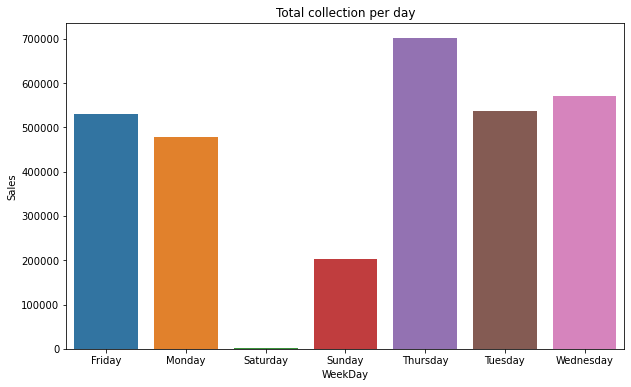

In [16]:
plt.subplots(figsize=(10, 6))
sns.barplot(x='Day_of_week',y='Price_Total',data=weekday_sales_df)
plt.xlabel('WeekDay')
plt.ylabel('Sales')
plt.title('Total collection per day')
plt.show()

In [17]:
weekly_sales_df = non_cancelled_Df.groupby(by='Weeknumber')['Price_Total'].sum().reset_index()
weekly_sales_df.head()

,Weeknumber,Price_Total
0,1,73153.82
1,2,59731.11
2,3,71511.15
3,4,57484.06
4,5,33676.91


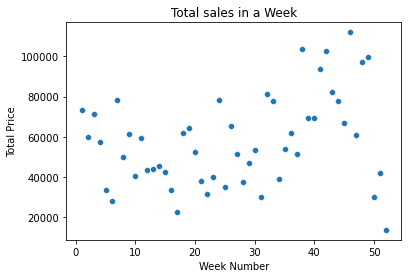

In [18]:
sns.scatterplot(x='Weeknumber',y='Price_Total',data = weekly_sales_df)
plt.xlabel('Week Number')
plt.ylabel('Total Price')
plt.title('Total sales in a Week')
plt.show()

#### 3.2.2 Total number of items ordered on different time frames

In [19]:
month_orders = non_cancelled_Df.groupby(by='Month')['Invoice'].count().reset_index(name='Counts')
month_orders


,Month,Counts
0,1,5277
1,2,4192
2,3,5698
3,4,4164
4,5,5954
5,6,6223
6,7,5778
7,8,6210
8,9,8399
9,10,10600


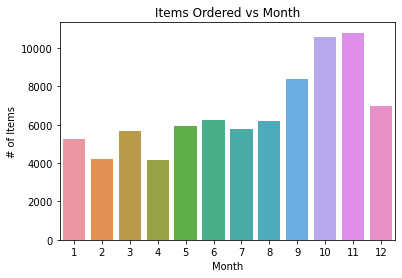

In [20]:
sns.barplot(x='Month',y='Counts',data=month_orders)
plt.xlabel('Month')
plt.ylabel('# of Items')
plt.title('Items Ordered vs Month')
plt.show()

In [21]:
weekday_orders = non_cancelled_Df.groupby(by='Day_of_week')['Invoice'].count().reset_index(name='Counts')
weekday_orders

,Day_of_week,Counts
0,Friday,14401
1,Monday,13632
2,Saturday,32
3,Sunday,6375
4,Thursday,17031
5,Tuesday,14395
6,Wednesday,14433


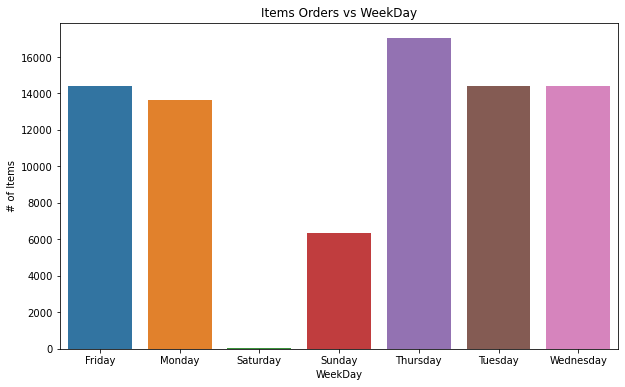

In [22]:
plt.subplots(figsize=(10, 6))
sns.barplot(x='Day_of_week',y='Counts',data=weekday_orders)
plt.xlabel('WeekDay')
plt.ylabel('# of Items')
plt.title('Items Orders vs WeekDay')
plt.show()

In [23]:
df_or.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'Price',
       'Customer_Id', 'Country', 'Day_of_week', 'Date', 'Hour', 'Month',
       'Year', 'Day', 'Weeknumber'],
      dtype='object')

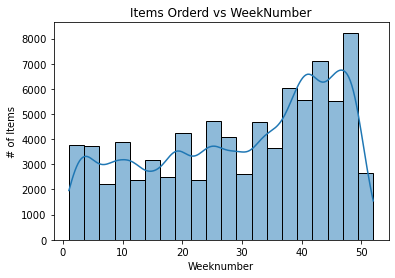

In [24]:
sns.histplot(x='Weeknumber',data=df_or,kde=True,bins=20)
plt.xlabel('Weeknumber')
plt.ylabel('# of Items')
plt.title('Items Orderd vs WeekNumber')
plt.show()

In [25]:
df_or.head()

,Invoice,StockCode,Description,Quantity,Price,Customer_Id,Country,Day_of_week,Date,Hour,Month,Year,Day,Weeknumber
71,489439,22065,CHRISTMAS PUDDING TRINKET POT,12,1.45,12682,France,Tuesday,2009-12-01,9,12,2009,1,49
72,489439,22138,BAKING SET 9 PIECE RETROSPOT,9,4.95,12682,France,Tuesday,2009-12-01,9,12,2009,1,49
73,489439,22139,RETRO SPOT TEA SET CERAMIC 11 PC,9,4.95,12682,France,Tuesday,2009-12-01,9,12,2009,1,49
74,489439,22352,LUNCHBOX WITH CUTLERY RETROSPOT,12,2.55,12682,France,Tuesday,2009-12-01,9,12,2009,1,49
75,489439,85014A,BLACK/BLUE DOTS RUFFLED UMBRELLA,3,5.95,12682,France,Tuesday,2009-12-01,9,12,2009,1,49


### 3.2.2 Performing Statistical test
Our goal is to perform a 2t test and find if there are any differences in the month sales pattern. 

* Null Hypothesis - There is no difference in the sales patterns across adjacent months
* Alternate Hypothesis - There is a difference in the sales patterns across adjacent months

In [26]:
sub_df = df_or.groupby(by=(['Month','Hour'])).size().reset_index(name='counts')
sub_df.shape

(153, 3)

In [27]:
sub_df.head()

jan_Df = sub_df[sub_df.Month == 1]
feb_Df = sub_df[sub_df.Month == 2]
march_Df = sub_df[sub_df.Month == 3]
april_Df = sub_df[sub_df.Month == 4]
may_Df = sub_df[sub_df.Month == 5]
june_Df = sub_df[sub_df.Month == 6]
july_Df = sub_df[sub_df.Month == 7]
aug_Df = sub_df[sub_df.Month == 8]
sep_Df = sub_df[sub_df.Month == 9]
oct_Df = sub_df[sub_df.Month == 1]
nov_Df = sub_df[sub_df.Month == 11]
dec_Df = sub_df[sub_df.Month == 12]



Text(0.5, 1.0, 'December Sales')

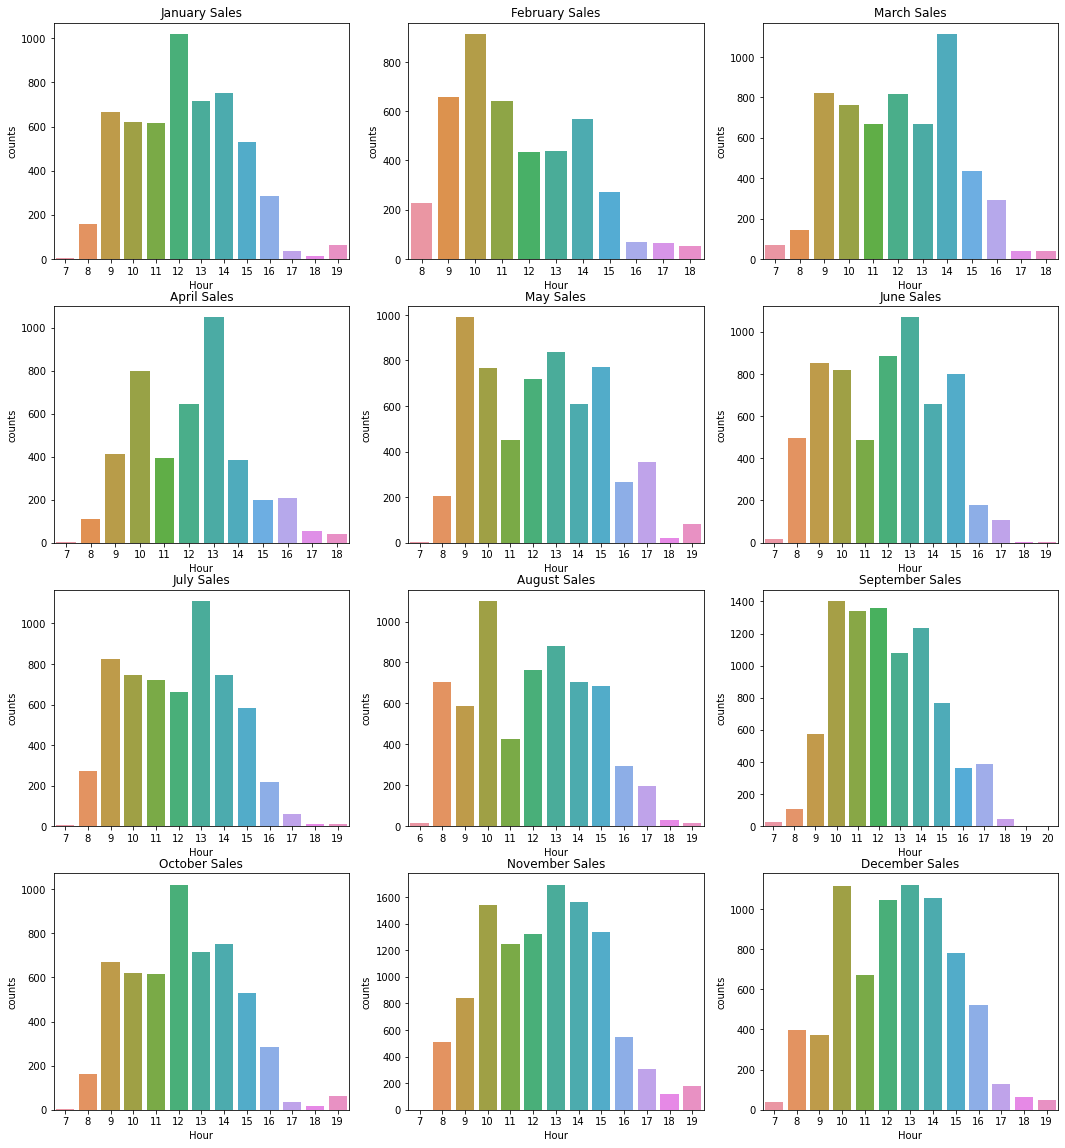

In [28]:
fig, axes = plt.subplots(4, 3,figsize =(18,20))
sns.barplot(ax=axes[0,0],data= jan_Df,x='Hour',y='counts')
axes[0,0].set_title('January Sales')
sns.barplot(ax=axes[0,1],data= feb_Df,x='Hour',y='counts')
axes[0,1].set_title('February Sales')
sns.barplot(ax=axes[0,2],data= march_Df,x='Hour',y='counts')
axes[0,2].set_title('March Sales')
sns.barplot(ax=axes[1,0],data= april_Df,x='Hour',y='counts')
axes[1,0].set_title('April Sales')
sns.barplot(ax=axes[1,1],data= may_Df,x='Hour',y='counts')
axes[1,1].set_title('May Sales')
sns.barplot(ax=axes[1,2],data= june_Df,x='Hour',y='counts')
axes[1,2].set_title('June Sales')
sns.barplot(ax=axes[2,0],data= july_Df,x='Hour',y='counts')
axes[2,0].set_title('July Sales')
sns.barplot(ax=axes[2,1],data= aug_Df,x='Hour',y='counts')
axes[2,1].set_title('August Sales')
sns.barplot(ax=axes[2,2],data= sep_Df,x='Hour',y='counts')
axes[2,2].set_title('September Sales')
sns.barplot(ax=axes[3,0],data= oct_Df,x='Hour',y='counts')
axes[3,0].set_title('October Sales')
sns.barplot(ax=axes[3,1],data= nov_Df,x='Hour',y='counts')
axes[3,1].set_title('November Sales')
sns.barplot(ax=axes[3,2],data= dec_Df,x='Hour',y='counts')
axes[3,2].set_title('December Sales')

In [29]:
t, p = ttest_ind(jan_Df['counts'], feb_Df['counts'], equal_var=False)
print("Jan Feb ttest_ind:            t = %g  p = %g" % (t, p))

t, p = ttest_ind(feb_Df['counts'], march_Df['counts'], equal_var=False)
print("Feb March ttest_ind:            t = %g  p = %g" % (t, p))

t, p = ttest_ind(march_Df['counts'], april_Df['counts'], equal_var=False)
print("March April ttest_ind:            t = %g  p = %g" % (t, p))

t, p = ttest_ind(april_Df['counts'], may_Df['counts'], equal_var=False)
print("April May ttest_ind:            t = %g  p = %g" % (t, p))

t, p = ttest_ind(may_Df['counts'], june_Df['counts'], equal_var=False)
print("May June ttest_ind:            t = %g  p = %g" % (t, p))

t, p = ttest_ind(june_Df['counts'], july_Df['counts'], equal_var=False)
print("June July ttest_ind:            t = %g  p = %g" % (t, p))

t, p = ttest_ind(july_Df['counts'], aug_Df['counts'], equal_var=False)
print("July Aug ttest_ind:            t = %g  p = %g" % (t, p))

t, p = ttest_ind(aug_Df['counts'], sep_Df['counts'], equal_var=False)
print("Aug Sep ttest_ind:            t = %g  p = %g" % (t, p))

t, p = ttest_ind(sep_Df['counts'], oct_Df['counts'], equal_var=False)
print("Sep Oct ttest_ind:            t = %g  p = %g" % (t, p))

t, p = ttest_ind(oct_Df['counts'], nov_Df['counts'], equal_var=False)
print("Oct Nov ttest_ind:            t = %g  p = %g" % (t, p))

t, p = ttest_ind(nov_Df['counts'], dec_Df['counts'], equal_var=False)
print("Nov Dec ttest_ind:            t = %g  p = %g" % (t, p))

t, p = ttest_ind(dec_Df['counts'], jan_Df['counts'], equal_var=False)
print("Dec Jan ttest_ind:            t = %g  p = %g" % (t, p))

Jan Feb ttest_ind:            t = 0.210617  p = 0.835125
Feb March ttest_ind:            t = -0.692325  p = 0.496517
March April ttest_ind:            t = 0.922651  p = 0.366325
April May ttest_ind:            t = -0.818604  p = 0.42144
May June ttest_ind:            t = -0.160687  p = 0.873709
June July ttest_ind:            t = 0.202988  p = 0.840857
July Aug ttest_ind:            t = -0.227349  p = 0.822083
Aug Sep ttest_ind:            t = -0.713527  p = 0.482948
Sep Oct ttest_ind:            t = 1.11878  p = 0.27546
Oct Nov ttest_ind:            t = -2.25426  p = 0.0363006
Nov Dec ttest_ind:            t = 1.42482  p = 0.168617
Dec Jan ttest_ind:            t = 0.947368  p = 0.353335


Based on our above analysis we can see that all the months except for Oct-Nov there is no significant changes in the item sales for the adjacent months.

### 3.2.3 Feature Engineering

The following steps are taken in the below feature engineering process
* Total Cart price for each day
* Calculate the average daily cart price
* Calculate daily unique orders
* Calculate 7 and 30 days pre orders 
* Calculate 30 days post orders

In [30]:
#Items sold daily
item_count_Df = df_or.groupby(by='Date')['StockCode'].count().reset_index(name='Item_counts')
item_count_Df.head()

,Date,Item_counts
0,2009-12-01,270
1,2009-12-02,58
2,2009-12-03,91
3,2009-12-04,116
4,2009-12-05,32


In [31]:
item_count_Df['Item_counts'].median()

122.0

#### 3.2.3.1 Total Cart price per day

In [32]:
#Total cart bill
df_or['Price_Total'] = df_or['Price'] * df_or['Quantity']

In [33]:
price_df = df_or.groupby(by=['Date'])['Price_Total'].agg(['sum']).rename(columns = {'sum':'TotalPrice'}).reset_index()
price_df['Date'] = pd.to_datetime(price_df['Date'], format='%Y-%m-%d')
price_df

,Date,TotalPrice
0,2009-12-01,6480.32
1,2009-12-02,7039.22
2,2009-12-03,752.25
3,2009-12-04,2518.07
4,2009-12-05,760.69
...,...,...
573,2011-12-05,3036.07
574,2011-12-06,3921.06
575,2011-12-07,20047.64
576,2011-12-08,2979.88


In [34]:
df_or['Date'] = pd.to_datetime(df_or['Date'], format='%Y-%m-%d')
print(df_or.Date.min())
print(df_or.Date.max())
df_or.head()

2009-12-01 00:00:00
2011-12-09 00:00:00


,Invoice,StockCode,Description,Quantity,Price,Customer_Id,Country,Day_of_week,Date,Hour,Month,Year,Day,Weeknumber,Price_Total
71,489439,22065,CHRISTMAS PUDDING TRINKET POT,12,1.45,12682,France,Tuesday,2009-12-01,9,12,2009,1,49,17.40
72,489439,22138,BAKING SET 9 PIECE RETROSPOT,9,4.95,12682,France,Tuesday,2009-12-01,9,12,2009,1,49,44.55
73,489439,22139,RETRO SPOT TEA SET CERAMIC 11 PC,9,4.95,12682,France,Tuesday,2009-12-01,9,12,2009,1,49,44.55
74,489439,22352,LUNCHBOX WITH CUTLERY RETROSPOT,12,2.55,12682,France,Tuesday,2009-12-01,9,12,2009,1,49,30.60
75,489439,85014A,BLACK/BLUE DOTS RUFFLED UMBRELLA,3,5.95,12682,France,Tuesday,2009-12-01,9,12,2009,1,49,17.85


#### 3.2.3.2 Unique orders per day

In [35]:
new_Df = df_or.groupby(by=['Invoice','Date'])['Invoice'].nunique().reset_index(name='counts')
new_Df.head()

,Invoice,Date,counts
0,489439,2009-12-01,1
1,489444,2009-12-01,1
2,489447,2009-12-01,1
3,489450,2009-12-01,1
4,489520,2009-12-01,1


In [36]:
new_Df = new_Df[['Date','counts']]

In [37]:
orders_df = new_Df.groupby(by = 'Date')['counts'].sum().reset_index(name='counts')
orders_df.head()

,Date,counts
0,2009-12-01,12
1,2009-12-02,7
2,2009-12-03,6
3,2009-12-04,7
4,2009-12-05,1


#### 3.2.3.3 Unique orders and Average Cart value per day

In [38]:
orders_df = pd.merge(orders_df,price_df,how="left",on='Date')
orders_df['Average_Price'] = orders_df['TotalPrice'] / orders_df['counts']
orders_df.head()


,Date,counts,TotalPrice,Average_Price
0,2009-12-01,12,6480.32,540.026667
1,2009-12-02,7,7039.22,1005.602857
2,2009-12-03,6,752.25,125.375000
3,2009-12-04,7,2518.07,359.724286
4,2009-12-05,1,760.69,760.690000


In [39]:
orders_df['Date'] = pd.to_datetime(orders_df['Date'],format='%Y-%m-%d')
orders_df.dtypes

Date             datetime64[ns]
counts                    int64
TotalPrice              float64
Average_Price           float64
dtype: object

In [40]:
all_Days_df = pd.read_csv('..\data\interim\\all_days.csv')

In [41]:
all_Days_df['Date'] = pd.to_datetime(all_Days_df['Date'],format='%Y-%m-%d')
all_Days_df.head()

,Date
0,2009-12-01
1,2009-12-02
2,2009-12-03
3,2009-12-04
4,2009-12-05


In [42]:
all_Days_df.dtypes

Date    datetime64[ns]
dtype: object

In [43]:
merged_Df = pd.merge(all_Days_df,orders_df,how="left",on="Date")
merged_Df.head()

,Date,counts,TotalPrice,Average_Price
0,2009-12-01,12.0,6480.32,540.026667
1,2009-12-02,7.0,7039.22,1005.602857
2,2009-12-03,6.0,752.25,125.375000
3,2009-12-04,7.0,2518.07,359.724286
4,2009-12-05,1.0,760.69,760.690000


In [44]:
merged_Df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 739 entries, 0 to 738
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           739 non-null    datetime64[ns]
 1   counts         578 non-null    float64       
 2   TotalPrice     578 non-null    float64       
 3   Average_Price  578 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 28.9 KB


In [45]:
print("Average daily orders - {}".format(merged_Df['counts'].median()))

Average daily orders - 7.0


In [46]:
merged_Df['counts'] = merged_Df['counts'].fillna(merged_Df['counts'].median())

In [47]:
merged_Df.isna().sum()

Date               0
counts             0
TotalPrice       161
Average_Price    161
dtype: int64

In [48]:
merged_Df[merged_Df['Date'] == '2009-12-25']

,Date,counts,TotalPrice,Average_Price
24,2009-12-25,7.0,NaN,NaN


In [49]:
holiday_list = ['2009-12-25','2009-12-28','2010-01-01','2010-04-02','2010-04-05','2010-05-03','2010-05-31','2010-12-27','2010-12-28','2011-01-03','2011-04-22','2011-04-25','2011-05-02','2011-05-30']

In [50]:
#Adding holiday list
for i in holiday_list:
    merged_Df.loc[merged_Df.Date == i,'is_holiday'] = 1

In [51]:
# Week before the holiday
date_range = (merged_Df['Date'] >= '2009-12-18') & (merged_Df['Date'] <= '2009-12-24')
    
pre_total_sales = merged_Df.loc[date_range]['counts'].sum()
print(pre_total_sales)


35.0


#### 3.2.3.4 Pre holiday orders (7 days)

In [52]:
#before holiday 
pre_dict = {}
for i in holiday_list:
    date_range = (merged_Df['Date'] >=  (pd.to_datetime(i) - pd.to_timedelta(7, unit='d'))) & (merged_Df['Date'] <= (pd.to_datetime(i) - pd.to_timedelta(1, unit='d')))
    
    pre_total_sales = merged_Df.loc[date_range]['counts'].sum()
    print("Pre Total orders for holiday list - {} is {}".format(i, pre_total_sales))
    pre_dict[i]=pre_total_sales

pre_sales_df = pd.DataFrame(pre_dict.items(), columns=['Date', 'Pre_orders'])


Pre Total orders for holiday list - 2009-12-25 is 35.0
Pre Total orders for holiday list - 2009-12-28 is 35.0
Pre Total orders for holiday list - 2010-01-01 is 49.0
Pre Total orders for holiday list - 2010-04-02 is 44.0
Pre Total orders for holiday list - 2010-04-05 is 39.0
Pre Total orders for holiday list - 2010-05-03 is 38.0
Pre Total orders for holiday list - 2010-05-31 is 43.0
Pre Total orders for holiday list - 2010-12-27 is 41.0
Pre Total orders for holiday list - 2010-12-28 is 40.0
Pre Total orders for holiday list - 2011-01-03 is 49.0
Pre Total orders for holiday list - 2011-04-22 is 39.0
Pre Total orders for holiday list - 2011-04-25 is 45.0
Pre Total orders for holiday list - 2011-05-02 is 38.0
Pre Total orders for holiday list - 2011-05-30 is 55.0


#### 3.2.3.5 Post holiday orders (7 days)

In [53]:
#After holiday
post_hol_sales = {}
for i in holiday_list:
    date_range = (merged_Df['Date'] >=  (pd.to_datetime(i) + pd.to_timedelta(1, unit='d'))) & (merged_Df['Date'] <= (pd.to_datetime(i) + pd.to_timedelta(7, unit='d')))
    
    post_sales = merged_Df.loc[date_range]['counts'].sum()
    print("Post Total orders for holiday list - {} is {}".format(i, post_sales))
    post_hol_sales[i]=post_sales

post_sales_df = pd.DataFrame(post_hol_sales.items(), columns=['Date', 'Post_orders'])


Post Total orders for holiday list - 2009-12-25 is 49.0
Post Total orders for holiday list - 2009-12-28 is 44.0
Post Total orders for holiday list - 2010-01-01 is 47.0
Post Total orders for holiday list - 2010-04-02 is 39.0
Post Total orders for holiday list - 2010-04-05 is 37.0
Post Total orders for holiday list - 2010-05-03 is 52.0
Post Total orders for holiday list - 2010-05-31 is 38.0
Post Total orders for holiday list - 2010-12-27 is 49.0
Post Total orders for holiday list - 2010-12-28 is 44.0
Post Total orders for holiday list - 2011-01-03 is 45.0
Post Total orders for holiday list - 2011-04-22 is 44.0
Post Total orders for holiday list - 2011-04-25 is 38.0
Post Total orders for holiday list - 2011-05-02 is 49.0
Post Total orders for holiday list - 2011-05-30 is 52.0


In [54]:
#before holiday 
pre_dict = {}
for i in holiday_list:
    date_range = (merged_Df['Date'] >=  (pd.to_datetime(i) - pd.to_timedelta(30, unit='d'))) & (merged_Df['Date'] <= (pd.to_datetime(i) - pd.to_timedelta(1, unit='d')))
    
    pre_total_sales = merged_Df.loc[date_range]['counts'].sum()
    print("Pre Total orders for holiday list - {} is {}".format(i, pre_total_sales))
    pre_dict[i]=pre_total_sales

pre_30_sales_df = pd.DataFrame(pre_dict.items(), columns=['Date', 'Pre_orders'])

#After holiday
post_hol_sales = {}
for i in holiday_list:
    date_range = (merged_Df['Date'] >=  (pd.to_datetime(i) + pd.to_timedelta(1, unit='d'))) & (merged_Df['Date'] <= (pd.to_datetime(i) + pd.to_timedelta(30, unit='d')))
    
    post_sales = merged_Df.loc[date_range]['counts'].sum()
    print("Post Total orders for holiday list - {} is {}".format(i, post_sales))
    post_hol_sales[i]=post_sales

post_30_sales_df = pd.DataFrame(post_hol_sales.items(), columns=['Date', 'Post_orders'])



Pre Total orders for holiday list - 2009-12-25 is 148.0
Pre Total orders for holiday list - 2009-12-28 is 169.0
Pre Total orders for holiday list - 2010-01-01 is 185.0
Pre Total orders for holiday list - 2010-04-02 is 205.0
Pre Total orders for holiday list - 2010-04-05 is 197.0
Pre Total orders for holiday list - 2010-05-03 is 179.0
Pre Total orders for holiday list - 2010-05-31 is 189.0
Pre Total orders for holiday list - 2010-12-27 is 213.0
Pre Total orders for holiday list - 2010-12-28 is 213.0
Pre Total orders for holiday list - 2011-01-03 is 202.0
Pre Total orders for holiday list - 2011-04-22 is 195.0
Pre Total orders for holiday list - 2011-04-25 is 188.0
Pre Total orders for holiday list - 2011-05-02 is 184.0
Pre Total orders for holiday list - 2011-05-30 is 215.0
Post Total orders for holiday list - 2009-12-25 is 196.0
Post Total orders for holiday list - 2009-12-28 is 222.0
Post Total orders for holiday list - 2010-01-01 is 212.0
Post Total orders for holiday list - 2010-04-

In [55]:
pre_post_sales_df = pd.merge(pre_sales_df,post_sales_df,how='inner',on='Date')
pre_post_sales_df


,Date,Pre_orders,Post_orders
0,2009-12-25,35.0,49.0
1,2009-12-28,35.0,44.0
2,2010-01-01,49.0,47.0
3,2010-04-02,44.0,39.0
4,2010-04-05,39.0,37.0
5,2010-05-03,38.0,52.0
6,2010-05-31,43.0,38.0
7,2010-12-27,41.0,49.0
8,2010-12-28,40.0,44.0
9,2011-01-03,49.0,45.0


In [56]:
merged_Df['is_holiday'] = merged_Df['is_holiday'].fillna(0)

#### 3.2.3.6 Pre (7,30 days) and Post (30 days) orders 

In [57]:
all_Days_lst = all_Days_df['Date'].tolist()

for i in all_Days_lst:
     if pd.to_datetime(i) > pd.to_datetime('2009-12-07'):
         date_range = (merged_Df['Date'] >=  (pd.to_datetime(i) - pd.to_timedelta(7, unit='d'))) & (merged_Df['Date'] <= (pd.to_datetime(i) - pd.to_timedelta(1, unit='d')))         
         valuessss = merged_Df.loc[date_range]['counts'].sum()
         merged_Df.loc[merged_Df.Date == i,'Pre_wk_orders'] = valuessss

for i in all_Days_lst:
     if pd.to_datetime(i) > pd.to_datetime('2009-12-30'):
         date_range = (merged_Df['Date'] >=  (pd.to_datetime(i) - pd.to_timedelta(30, unit='d'))) & (merged_Df['Date'] <= (pd.to_datetime(i) - pd.to_timedelta(1, unit='d')))         
         valuessss = merged_Df.loc[date_range]['counts'].sum()
         merged_Df.loc[merged_Df.Date == i,'Pre_30_orders'] = valuessss

for i in all_Days_lst:
    date_range = (merged_Df['Date'] >=  (pd.to_datetime(i))) & (merged_Df['Date'] <= (pd.to_datetime(i) + pd.to_timedelta(30, unit='d')))         
    valuessss = merged_Df.loc[date_range]['counts'].sum()
    merged_Df.loc[merged_Df.Date == i,'Post_30_orders'] = valuessss         

In [58]:
merged_Df[merged_Df['Pre_wk_orders'] > 0]

,Date,counts,TotalPrice,Average_Price,is_holiday,Pre_wk_orders,Pre_30_orders,Post_30_orders
7,2009-12-08,13.0,2649.18,203.783077,0.0,48.0,NaN,195.0
8,2009-12-09,6.0,2194.38,365.730000,0.0,49.0,NaN,190.0
9,2009-12-10,7.0,702.91,100.415714,0.0,48.0,NaN,191.0
10,2009-12-11,4.0,-51.30,-12.825000,0.0,49.0,NaN,185.0
11,2009-12-12,7.0,NaN,NaN,0.0,46.0,NaN,192.0
...,...,...,...,...,...,...,...,...
734,2011-12-05,14.0,3036.07,216.862143,0.0,79.0,361.0,61.0
735,2011-12-06,13.0,3921.06,301.620000,0.0,82.0,368.0,47.0
736,2011-12-07,17.0,20047.64,1179.272941,0.0,84.0,373.0,34.0
737,2011-12-08,9.0,2979.88,331.097778,0.0,81.0,379.0,17.0


In [59]:
for i in holiday_list:
    if pd.to_datetime(i).month == 4 or pd.to_datetime(i).month == 5:
        merged_Df.loc[merged_Df.Date == i,'Sales_boost'] = 1

merged_Df[merged_Df.Sales_boost == 1]
merged_Df['Sales_boost'] = merged_Df['Sales_boost'].fillna(0)

In [60]:
merged_Df.head()

,Date,counts,TotalPrice,Average_Price,is_holiday,Pre_wk_orders,Pre_30_orders,Post_30_orders,Sales_boost
0,2009-12-01,12.0,6480.32,540.026667,0.0,NaN,NaN,197.0,0.0
1,2009-12-02,7.0,7039.22,1005.602857,0.0,NaN,NaN,192.0,0.0
2,2009-12-03,6.0,752.25,125.375000,0.0,NaN,NaN,192.0,0.0
3,2009-12-04,7.0,2518.07,359.724286,0.0,NaN,NaN,193.0,0.0
4,2009-12-05,1.0,760.69,760.690000,0.0,NaN,NaN,188.0,0.0


In [61]:
merged_Df['Pre_wk_orders'] = merged_Df['Pre_wk_orders'].fillna(0)
merged_Df['Pre_30_orders'] = merged_Df['Pre_30_orders'].fillna(0)


In [62]:
final_df = pd.merge(merged_Df,df_or,how='left',on = 'Date')
final_df.head()

,Date,counts,TotalPrice,Average_Price,is_holiday,Pre_wk_orders,Pre_30_orders,Post_30_orders,Sales_boost,Invoice,...,Price,Customer_Id,Country,Day_of_week,Hour,Month,Year,Day,Weeknumber,Price_Total
0,2009-12-01,12.0,6480.32,540.026667,0.0,0.0,0.0,197.0,0.0,489439,...,1.45,12682.0,France,Tuesday,9.0,12.0,2009.0,1.0,49.0,17.40
1,2009-12-01,12.0,6480.32,540.026667,0.0,0.0,0.0,197.0,0.0,489439,...,4.95,12682.0,France,Tuesday,9.0,12.0,2009.0,1.0,49.0,44.55
2,2009-12-01,12.0,6480.32,540.026667,0.0,0.0,0.0,197.0,0.0,489439,...,4.95,12682.0,France,Tuesday,9.0,12.0,2009.0,1.0,49.0,44.55
3,2009-12-01,12.0,6480.32,540.026667,0.0,0.0,0.0,197.0,0.0,489439,...,2.55,12682.0,France,Tuesday,9.0,12.0,2009.0,1.0,49.0,30.60
4,2009-12-01,12.0,6480.32,540.026667,0.0,0.0,0.0,197.0,0.0,489439,...,5.95,12682.0,France,Tuesday,9.0,12.0,2009.0,1.0,49.0,17.85


In [63]:
final_trim_df = final_df[['counts','TotalPrice','Average_Price','is_holiday','Pre_wk_orders','Pre_30_orders','Post_30_orders','Sales_boost','Invoice','StockCode','Quantity','Price','Customer_Id','Hour','Month','Year','Day','Weeknumber']]

In [64]:
final_trim_df.isna().sum()

counts              0
TotalPrice        161
Average_Price     161
is_holiday          0
Pre_wk_orders       0
Pre_30_orders       0
Post_30_orders      0
Sales_boost         0
Invoice           161
StockCode         161
Quantity          161
Price             161
Customer_Id       161
Hour              161
Month             161
Year              161
Day               161
Weeknumber        161
dtype: int64

In [65]:
final_trim_df = final_trim_df[~(final_trim_df['Customer_Id'].isna())]
final_trim_df.isna().sum()

counts            0
TotalPrice        0
Average_Price     0
is_holiday        0
Pre_wk_orders     0
Pre_30_orders     0
Post_30_orders    0
Sales_boost       0
Invoice           0
StockCode         0
Quantity          0
Price             0
Customer_Id       0
Hour              0
Month             0
Year              0
Day               0
Weeknumber        0
dtype: int64

In [66]:
final_trim_df.dtypes

counts            float64
TotalPrice        float64
Average_Price     float64
is_holiday        float64
Pre_wk_orders     float64
Pre_30_orders     float64
Post_30_orders    float64
Sales_boost       float64
Invoice            object
StockCode          object
Quantity          float64
Price             float64
Customer_Id       float64
Hour              float64
Month             float64
Year              float64
Day               float64
Weeknumber        float64
dtype: object

### 3.2.4 PPScore 

<AxesSubplot:xlabel='x', ylabel='y'>

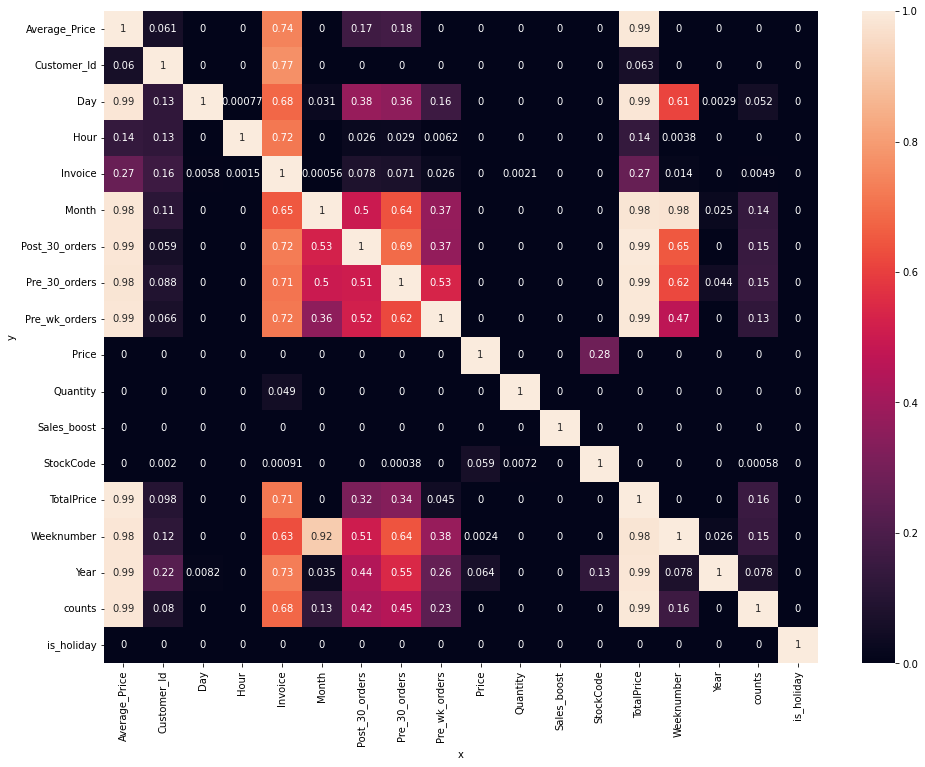

In [67]:
matrix_df = pps.matrix(final_trim_df).pivot(columns='x', index='y',  values='ppscore')
plt.figure(figsize=(16,12))
sns.heatmap(matrix_df, annot=True)

<AxesSubplot:xlabel='x', ylabel='y'>

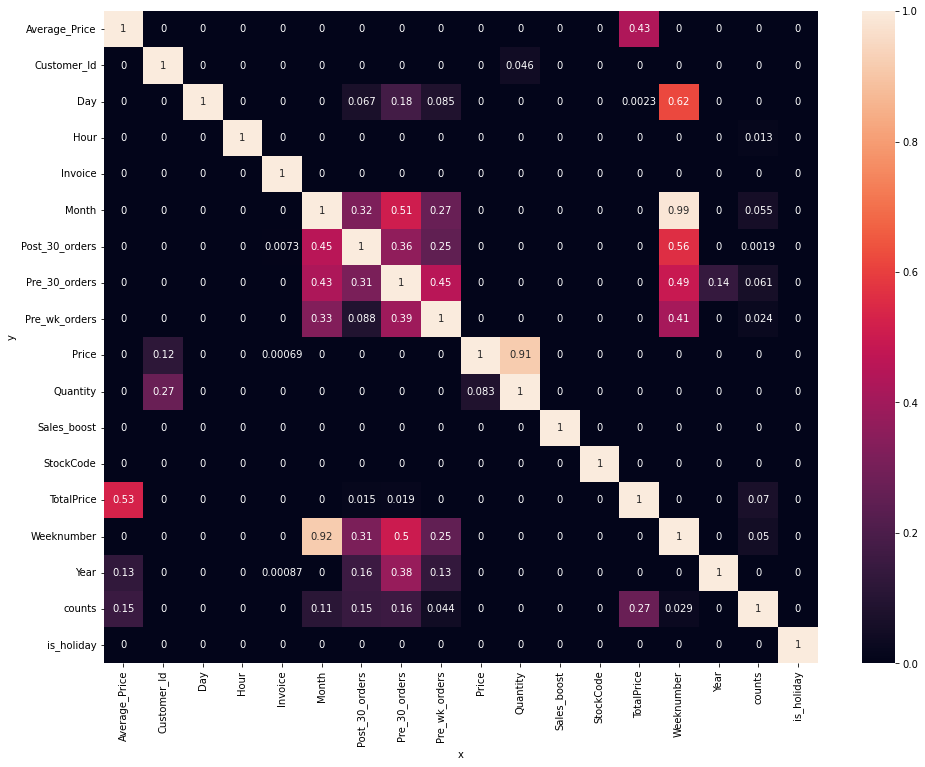

In [68]:
final_trim_1_df = final_trim_df[final_trim_df['StockCode'] == '85123A']

matrix_df = pps.matrix(final_trim_1_df).pivot(columns='x', index='y',  values='ppscore')
plt.figure(figsize=(16,12))
sns.heatmap(matrix_df, annot=True)

<AxesSubplot:>

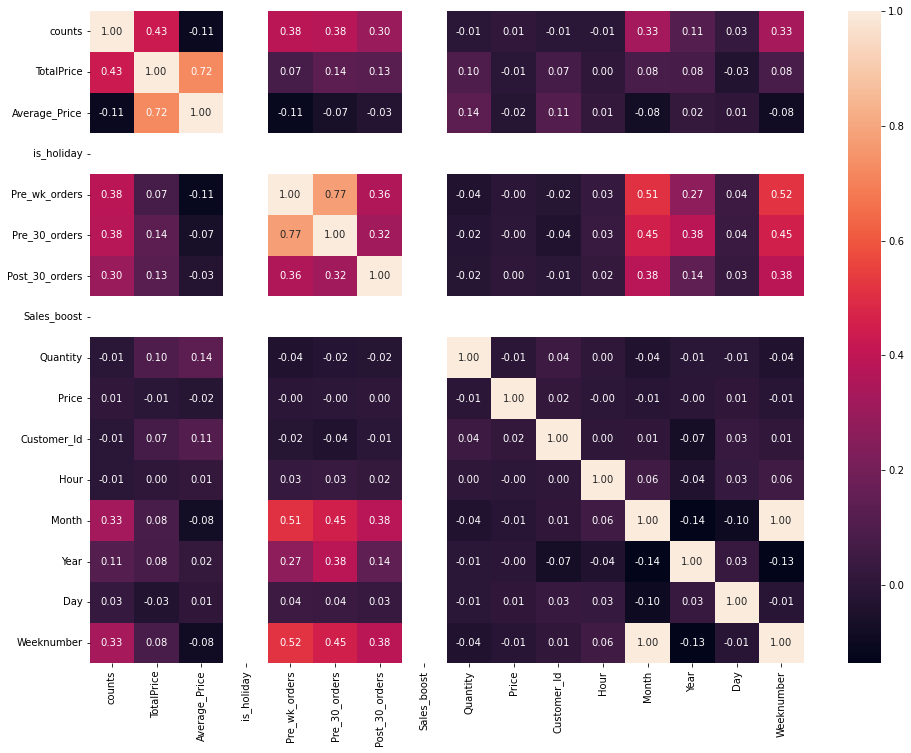

In [69]:
plt.figure(figsize=(16,12))
sns.heatmap(final_trim_df.corr(),annot=True,fmt=".2f")

## 3.3 Save data

In [70]:
final_trim_df.to_csv('..\data\processed\\Final_EDA_NonUK.csv', index=False)